In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [53]:
# Load the Excel file
file_path = '/content/mydrive/MyDrive/QA_Zafar/city_clustering_dataset.xlsx'

# Load the data from the 'Data' sheet
data_df = pd.read_excel(file_path, sheet_name='Data')
data_df.head()


,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome
0,Albuquerque,3,35,2,32,5,18
1,Atlanta,67,2,1,31,5,22
2,Austin,12,23,3,29,3,19
3,Baltimore,59,1,1,33,11,22
4,Boston,26,11,5,30,5,24


In [6]:
#Step 3: Extract and Standardize Features
#1) PctAfrAmer, PctHispanic, PctAsian: These percentages represent the demographic composition of each city.
#2) MedianAge: This represents the median age of the population in each city.
#3) UnempRate: This is the unemployment rate in each city.
#4) PCIncome: This is the per capita income in each city.

In [5]:
# Extract relevant features
features = data_df[['PctAfrAmer', 'PctHispanic', 'PctAsian', 'MedianAge', 'UnempRate', 'PCIncome']]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)


In [7]:
#Step 4: Determine the Optimal Number of Clusters Using the Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

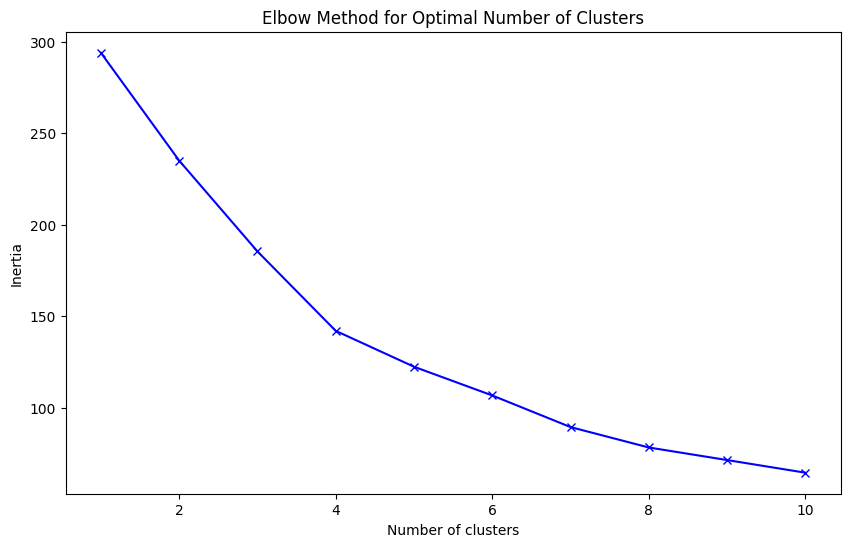

In [8]:
# Use the Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [30]:
#Step 5: Apply K-Means Clustering
# Choose 4 clusters based on the Elbow Method
kmeans = KMeans(n_clusters=4, random_state=42)
data_df['Cluster'] = kmeans.fit_predict(standardized_data)

# Add the cluster labels to the original dataframe
data_df['Cluster'] = kmeans.labels_
data_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome,Cluster,Distance_to_Centroid
0,Albuquerque,3,35,2,32,5,18,1,1.532535
1,Atlanta,67,2,1,31,5,22,0,1.960668
2,Austin,12,23,3,29,3,19,1,1.797007
3,Baltimore,59,1,1,33,11,22,0,1.094788
4,Boston,26,11,5,30,5,24,1,1.681278


In [31]:
data_df['Cluster'].unique()

array([1, 0, 2, 3], dtype=int32)

In [10]:
#Step 6: Calculate Euclidean Distances to Centroids

In [32]:
# Calculate the Euclidean distance from each data point to its respective cluster centroid
distances = kmeans.transform(standardized_data)  # This gives the distances to all centroids
data_df['Distance_to_Centroid'] = [distances[i][label] for i, label in enumerate(kmeans.labels_)]

data_df.head()


,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome,Cluster,Distance_to_Centroid
0,Albuquerque,3,35,2,32,5,18,1,1.821440
1,Atlanta,67,2,1,31,5,22,0,1.923569
2,Austin,12,23,3,29,3,19,1,1.849539
3,Baltimore,59,1,1,33,11,22,0,1.050151
4,Boston,26,11,5,30,5,24,1,1.453083


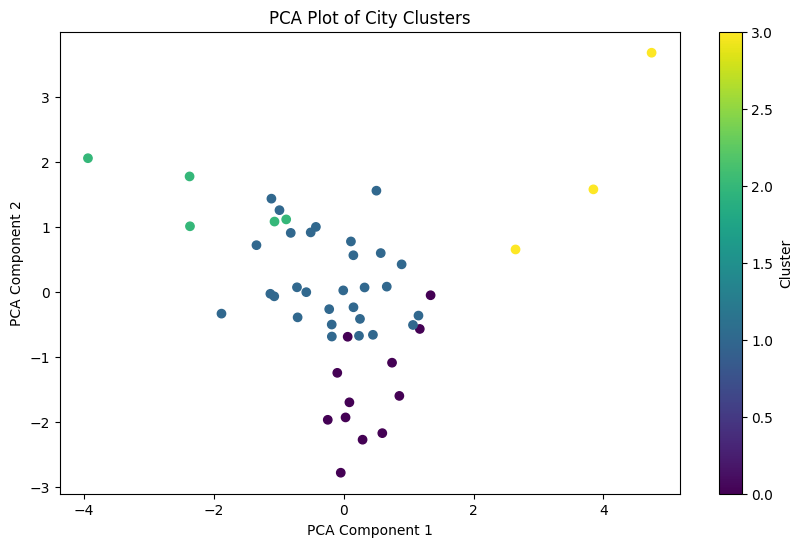

In [33]:
#Step 7: Visualize the Clusters Using PCA
# Reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(standardized_data)

# Create a scatter plot of the PCA components with cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data_df['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot of City Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [35]:
data_df[['City','Cluster']]

,City,Cluster
0,Albuquerque,1
1,Atlanta,0
2,Austin,1
3,Baltimore,0
4,Boston,1
5,Charlotte,1
6,Chicago,0
7,Cincinnati,0
8,Cleveland,0
9,Columbus,1


In [43]:
data_df[data_df['Cluster'] == 0].shape

(12, 9)

In [44]:
data_df[data_df['Cluster'] == 1].shape

(29, 9)

In [45]:
data_df[data_df['Cluster'] == 2].shape

(5, 9)

In [46]:
data_df[data_df['Cluster'] == 3].shape

(3, 9)

In [49]:
data_df[data_df['Cluster'] == 0]

,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome,Cluster,Distance_to_Centroid
1,Atlanta,67,2,1,31,5,22,0,1.923569
3,Baltimore,59,1,1,33,11,22,0,1.050151
6,Chicago,39,20,4,31,9,24,0,1.299461
7,Cincinnati,38,1,1,31,8,21,0,1.139276
8,Cleveland,47,5,1,32,13,22,0,1.504992
12,Detroit,76,3,1,31,9,21,0,1.624020
24,Memphis,55,1,1,32,9,20,0,0.841016
29,New Orleans,62,4,2,32,7,18,0,1.656355
30,NY,29,24,7,34,11,27,0,2.469312
31,Oakland,44,14,15,33,10,24,0,1.430632


In [50]:
data_df[data_df['Cluster'] == 1]

,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome,Cluster,Distance_to_Centroid
0,Albuquerque,3,35,2,32,5,18,1,1.821440
2,Austin,12,23,3,29,3,19,1,1.849539
4,Boston,26,11,5,30,5,24,1,1.453083
5,Charlotte,32,1,2,32,3,20,1,1.519158
9,Columbus,23,1,2,29,3,13,1,2.880425
10,Dallas,30,21,2,30,9,22,1,1.770693
11,Denver,13,23,2,34,7,23,1,1.723774
14,Fort Worth,22,20,2,30,9,20,1,1.555737
17,Houston,28,28,4,30,7,22,1,1.529575
18,Indianapolis,22,1,1,32,5,21,1,0.887424


In [51]:
data_df[data_df['Cluster'] == 2]

,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome,Cluster,Distance_to_Centroid
13,El Paso,3,69,1,29,11,13,2,1.934656
15,Fresno,9,30,13,28,13,16,2,2.303328
23,Los Angeles,14,40,10,31,11,21,2,1.545574
25,Miami,27,63,1,36,12,17,2,2.937137
40,San Antonio,7,56,1,30,5,17,2,2.140374


In [52]:
data_df[data_df['Cluster'] == 3]

,City,PctAfrAmer,PctHispanic,PctAsian,MedianAge,UnempRate,PCIncome,Cluster,Distance_to_Centroid
16,Honolulu,1,5,71,37,5,24,3,3.312626
42,San Francisco,11,14,29,36,6,31,3,1.358843
44,Seattle,10,4,12,35,5,28,3,2.372648
